# 多元线性回归

## 波士顿房价问题

In [2]:
import matplotlib.pyplot as plt
import numpy as np
# 读取csv文件库
import pandas as pd
import tensorflow as tf
# 数据洗牌
from sklearn.utils import shuffle

tf.compat.v1.disable_eager_execution()

## 数据处理

|       |                       |         |                  |
|:-----:|:---------------------:|:-------:|:----------------:|
| CRIM  |        城镇人均犯罪率        |   AGE   | 1940年之前建成的自用房屋比例 |
|  ZN   | 住宅用地超过25000 sq.ft 的比例 |   DIS   | 到波士顿5个中心区域的加权距离  |
| INDUS |     城镇非零售商用土地的比例      |   RAD   |    辐射性公路的靠近指数    |
| CHAS  |     边界是河流为1，否则为0      |   TAX   | 每10000美元的全值财产税率  |
|  NOX  |        一氧化氮浓度         | PTRATIO |      城镇师生比例      |
|  RM   |        住宅平均房间数        |  LSTAT  |   人口中地位低下者的比例    |
|       |                       |  MEDV   | 自主房的平均房价，单位：千美元  |

In [3]:
# 读取数据文件
df = pd.read_csv("Data/boston.csv", header=0)

# 显示数据摘要信息
print(df.describe())

             CRIM         ZN       INDUS         CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO       LSTAT  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534   12.653063   
std     28.148861    2.1057

In [4]:
# 显示所有数据
print(df)

        CRIM   ZN   INDUS   CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
0    0.00632  18.0    2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0    7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0    7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0    2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0    2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...     ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0   11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0   11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0   11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0   11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0   11.93     0  0.573  6.030  80.8  2.5050    1  273   

     PTRATIO  LSTAT  MEDV  
0       15.3   4.98  24.0  
1       17.8   9.14  21.6  
2       17.8   4.03  34.7  

## 数据准备

In [5]:
# 获取df的值
df = df.values

print(df)

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 4.9800e+00 2.4000e+01]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 9.1400e+00 2.1600e+01]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 4.0300e+00 3.4700e+01]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 5.6400e+00 2.3900e+01]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 6.4800e+00 2.2000e+01]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 7.8800e+00 1.1900e+01]]


In [6]:
# 把df转换为np的数组格式
# 输出结果看似与上面语句一样，但实际数据类型已被转化为适合进行numpy处理的数据类型
df = np.array(df)

print(df)

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 4.9800e+00 2.4000e+01]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 9.1400e+00 2.1600e+01]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 4.0300e+00 3.4700e+01]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 5.6400e+00 2.3900e+01]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 6.4800e+00 2.2000e+01]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 7.8800e+00 1.1900e+01]]


## 特征数据归一化

In [7]:
# 如有以下例子：
# 制作一份鸡汤，需要用到鸡、水、姜、葱、蒜、盐等材料，但材料间的取值范围均不相同
# 水的取值范围可能在2000克到3000克，但相比较之下盐可能仅需要1克2克，这样的取值范围在多元线性回归中是不合理的
#
# 为防止不同特征值取值范围之间的差异性，需要对特征数据进行归一化
# 归一化过程：[特征值 / max(特征值) - min(特征值)]

# 对特征数据【0到11】列进行归一化（缩小差异区间至0~1）处理
for i in range(12):
    df[:, i] = df[:, i] / (df[:, i].max() - df[:, i].min())

# x_data 为前12列特征数据
x_data = df[:, :12]  # [:, :12]表示从0~11列

# y_data 为最后1列标签数据
y_data = df[:, 12]  # [:, 12]表示第12列

In [8]:
print(x_data, "\n shape =", x_data.shape)

[[7.10352762e-05 1.80000000e-01 8.46774194e-02 ... 5.64885496e-01
  1.62765957e+00 1.37417219e-01]
 [3.06957815e-04 0.00000000e+00 2.59164223e-01 ... 4.61832061e-01
  1.89361702e+00 2.52207506e-01]
 [3.06733020e-04 0.00000000e+00 2.59164223e-01 ... 4.61832061e-01
  1.89361702e+00 1.11203091e-01]
 ...
 [6.82927750e-04 0.00000000e+00 4.37316716e-01 ... 5.20992366e-01
  2.23404255e+00 1.55629139e-01]
 [1.23176518e-03 0.00000000e+00 4.37316716e-01 ... 5.20992366e-01
  2.23404255e+00 1.78807947e-01]
 [5.32876969e-04 0.00000000e+00 4.37316716e-01 ... 5.20992366e-01
  2.23404255e+00 2.17439294e-01]] (506, 12)


In [9]:
print(y_data, "\n shape =", y_data.shape)

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

## 定义模型

In [10]:
# 定义特征数据和标签数据的占位符

# shape 中的 None 表示行的数量未知，在实际训练中决定一次带入多少行样本，从一个样本随机的随机SGD到批量SGD都可以

# 12个特征数值（12列）
x = tf.compat.v1.placeholder(tf.float32, [None, 12], name="X")

# 1个标签数据（1列）
y = tf.compat.v1.placeholder(tf.float32, [None, 1], name="Y")

In [11]:
# 创建变量、定义模型
# 定义一个命名空间
with tf.name_scope("Model"):
    # w 初始值为 shape = （12，1）的随机数
    w = tf.Variable(tf.compat.v1.random_normal([12, 1], stddev=0.01), name="W")

    # b 初始值为1.0
    b = tf.Variable(1.0, name="b")


    # Y = (x1 * w1 * x) + (x2 * w2 * x) + (x3 * w3 * x) + ... + (xn * w * nx) + b
    # w和x 是矩阵相乘，用 matmul，不能用 普通乘法multiple 或者 乘法符号“*”
    # [[x1, x2, x3 ... xn]] * [[w1], + b = [x1 * w1 + x2 * w2 + x3 * w3 + ... xn * wn] + b
    #                          [w2],
    #                          [w3],
    #                          ....,
    #                          [wn]]
    def model(x, w, b):
        return tf.matmul(x, w) + b


    # 预测计算操作，前向计算节点
    pred = model(x, w, b)

## 模型训练准备

In [12]:
# 设置超参数
train_epochs = 200

# 学习率
learning_rate = 0.01

In [13]:
# 定义均方差损失函数
with tf.name_scope("LossFunction"):
    # 均方误差
    loss_function = tf.reduce_mean(tf.pow(y - pred, 2))

In [14]:
# 选择优化器
optimizer = tf.compat.v1.train.GradientDescentOptimizer(learning_rate).minimize(loss_function)

In [15]:
# 定义会话
session = tf.compat.v1.Session()

# 初始化变量
init = tf.compat.v1.global_variables_initializer()

session.run(init)

## TensorBoard 可视化准备

In [16]:
# 为TensorBoard 准备数据
logdir = "Log/"

# 创建一个操作，记录损失值loss，后面在TensorBoard中Scales栏可见
sum_loss_op = tf.compat.v1.summary.scalar("loss", loss_function)

# 把所有需要记录摘要日志文件合并，方便一次性写入
merged = tf.compat.v1.summary.merge_all()

# 创建摘要writer，将计算图写入摘要文件，后面在TensorBoard中Graph栏可见
writer = tf.compat.v1.summary.FileWriter(logdir, session.graph)

## 模型训练

Epoch =  1 loss =  44.35852601579297 b =  3.6073165 w =  [[-0.612525  ]
 [ 1.3802962 ]
 [-0.78343046]
 [ 0.49876517]
 [ 2.51374   ]
 [ 7.1614304 ]
 [-0.05358038]
 [ 0.7890008 ]
 [ 0.38036114]
 [ 0.32417458]
 [ 2.3229256 ]
 [-4.3868184 ]]
Epoch =  2 loss =  32.05152875312213 b =  3.9959817 w =  [[-1.1624151 ]
 [ 1.9636409 ]
 [-1.5134851 ]
 [ 0.85242784]
 [ 2.8889217 ]
 [10.601642  ]
 [-0.8208501 ]
 [ 0.34963477]
 [ 0.62863815]
 [-0.2664935 ]
 [ 1.1588571 ]
 [-8.104674  ]]
Epoch =  3 loss =  27.348095552348557 b =  4.277367 w =  [[ -1.6605167]
 [  2.1810417]
 [ -1.9633726]
 [  1.061538 ]
 [  3.1693132]
 [ 13.199973 ]
 [ -1.1972103]
 [ -0.1828404]
 [  0.9348557]
 [ -0.7671909]
 [  0.2263956]
 [-10.961985 ]]
Epoch =  4 loss =  24.676894930035495 b =  4.499048 w =  [[ -2.1180627 ]
 [  2.2076256 ]
 [ -2.2400825 ]
 [  1.1559718 ]
 [  3.3526745 ]
 [ 15.191659  ]
 [ -1.3591822 ]
 [ -0.72648835]
 [  1.2587949 ]
 [ -1.1987057 ]
 [ -0.50820035]
 [-13.18396   ]]
Epoch =  5 loss =  23.10722160245343

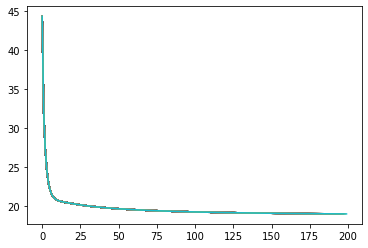

In [17]:
# 用于保存 loss 值的列表
loss_list = []

for epoch in range(train_epochs):
    loss_sum = 0.0
    for xs, ys in zip(x_data, y_data):
        # Feed数据必须和Placeholder的shape一致
        xs = xs.reshape(1, 12)
        ys = ys.reshape(1, 1)

        # 下划线 _ 指接收结果，本例中暂且用不到该值，代表优化器返回值
        _, summary_str, loss = session.run([optimizer, sum_loss_op, loss_function], feed_dict={x: xs, y: ys})

        writer.add_summary(summary_str, epoch)
        loss_sum = loss_sum + loss

    # 每次训练都打乱数据，防止假学习（只记顺序不真正学习）
    xvalues, yvalues = shuffle(x_data, y_data)

    b0temp = b.eval(session=session)
    w0temp = w.eval(session=session)

    loss_average = loss_sum / len(y_data)

    loss_list.append(loss_average)

    print("Epoch = ", epoch + 1, "loss = ", loss_average, "b = ", b0temp, "w = ", w0temp)

    plt.plot(loss_list)

## 使用TensorBoard查看损失值

```bash
tensorboard --logdir="Log/"
```

## 利用模型进行预测

In [18]:
# 由于本例中将所有数据都作为训练集进行训练，此处暂无新数据可供预测，故随机抽取一条训练集中的数据进行预测
n = np.random.randint(506)
print(n)

x_test = x_data[n]

x_test = x_test.reshape(1, 12)
predict = session.run(pred, feed_dict={x: x_test})
print("预测值%f" % predict)

target = y_data[n]
print("目标值%f" % target)

353
预测值24.135353
目标值30.100000
